In [128]:
# Importing packages in juypter notebook 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [129]:
# Read csv file in puython notebook 
tit = pd.read_csv(r"C:\Users\pravi\Downloads\titanic_data.csv")

In [130]:
# see the data by using code 
tit.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [131]:
# print the name of columns .
print("names of the columns:",tit.columns)

names of the columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [132]:
# here we check total number of columns and rows .
print("total no of rows:",tit.shape[0])
print("total no of columns :",tit.shape[1])

total no of rows: 891
total no of columns : 12


In [133]:
# here we check the total no of unique values .
for i in tit.columns:
    print("columns name :",i,"total no of unique values :",len(tit[i].unique()))

columns name : PassengerId total no of unique values : 891
columns name : Survived total no of unique values : 2
columns name : Pclass total no of unique values : 3
columns name : Name total no of unique values : 891
columns name : Sex total no of unique values : 2
columns name : Age total no of unique values : 89
columns name : SibSp total no of unique values : 7
columns name : Parch total no of unique values : 7
columns name : Ticket total no of unique values : 681
columns name : Fare total no of unique values : 248
columns name : Cabin total no of unique values : 148
columns name : Embarked total no of unique values : 4


In [134]:
# in above row we see the ticket , fare and cabin has many unique values so here we remove a that columns .
tit = tit.drop(columns=['PassengerId','Ticket','Cabin'])

print("total no of columns :",tit.columns)

total no of columns : Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [135]:
# here we check the na values .
tit.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [136]:
# here we remove the embarked columns from the data because here the no values are there .
 
tit = tit.dropna(subset=['Embarked'])

# return verify the na values .
tit.isnull().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [137]:
# here we deal the age na values  .
Age_mean = np.round(tit['Age'].mean())
print(Age_mean)

30.0


In [138]:
# here we subsitue the na values of Age ...
tit.loc[tit.Age.isnull(),'Age'] = Age_mean

In [139]:
# here we return check the na values ...
tit.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:>

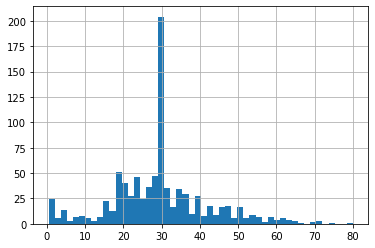

In [140]:
# here we plot the histogram graph ...
tit.Age.hist(bins=50)    

<AxesSubplot:xlabel='[Age]', ylabel='[Fare]'>

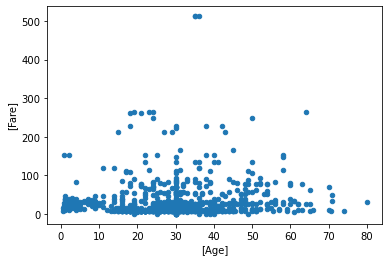

In [141]:
# here we draw the scatter graph ...
tit.plot.scatter(x=['Age'],y=['Fare'])

<AxesSubplot:>

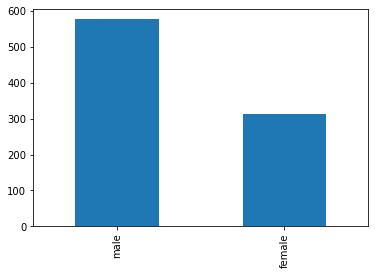

In [142]:
# here we draw the categorical bar ...
tit.Sex.value_counts().plot.bar()

<AxesSubplot:xlabel='Age'>

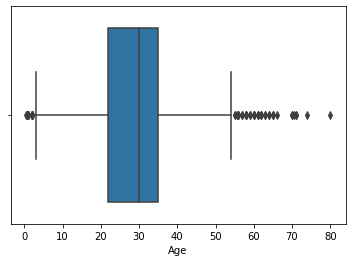

In [143]:
# here we draw the seaborn ..
import seaborn as sns

sns.boxplot(x=tit['Age'])

In [144]:
# here we find the outlayer and remove from the data ...
Q1 = tit['Age'].quantile(0.25)
Q3 = tit['Age'].quantile(0.75)
IQR = Q3 - Q1


upper_bound = Q3 + (1.5*IQR)
lower_bound = Q1 - (1.5*IQR)

print(lower_bound,upper_bound)

2.5 54.5


<AxesSubplot:xlabel='Age'>

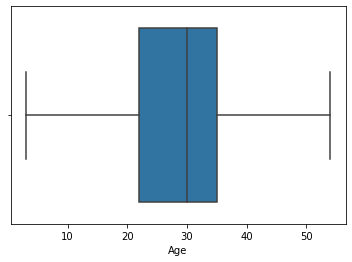

In [145]:
# here assign the value lower bond to lower bond ...
tit.loc[(tit.Age < lower_bound),'Age'] = np.ceil(lower_bound)   # Round reduces 2.5 to 2 which again appears as an outlier

# here we assign values above upper bound to upper bound
tit.loc[(tit.Age > upper_bound),'Age'] = np.round(upper_bound)

# here we verify the data 
import seaborn as sns

sns.boxplot(x=tit['Age'])

<AxesSubplot:>

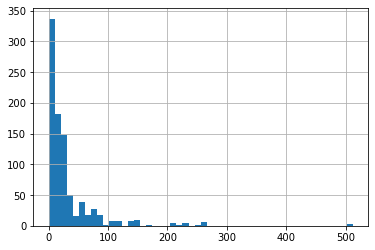

In [146]:
# here we draw the histogram of fare ...
tit['Fare'].hist(bins=50)

<AxesSubplot:xlabel='Fare'>

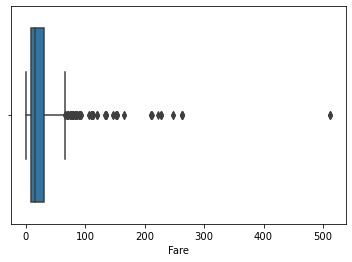

In [147]:
# distribution of Fare is highly skewed ,not at all normal...
import seaborn as sns

sns.boxplot(x=tit['Fare'])

In [148]:
Q1 = tit['Fare'].quantile(0.25)
Q3 = tit['Fare'].quantile(0.75)
IQR = Q3 - Q1


upper_bound = Q3 + (1.5*IQR)
lower_bound = 0 if Q1 - (1.5*IQR) <0 else Q1 - (1.5*IQR)

print(lower_bound,upper_bound)

0 65.6563


In [149]:
tit.loc[(tit.Fare>upper_bound),'Fare'] = upper_bound

In [150]:
tit.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.389201,0.524184,0.382452,23.956061
std,0.486260,0.834700,11.967220,1.103705,0.806761,20.414997
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,54.000000,8.000000,6.000000,65.656300


In [151]:
# here age and fare are in normal form ...
tit.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,65.6563,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [152]:
# here we need to do one hot encoding for embarked column and sex Column ...
tit = pd.get_dummies(tit,columns=["Sex"])

tit.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,65.6563,C,1,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,1,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,0,1


In [153]:
tit = pd.get_dummies(tit,columns=["Embarked"])

tit.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,65.6563,1,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,0,0,0,1
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,1,0,0,1


In [154]:
#Drop name because it is not important

tit = tit.drop(columns=['Name'])

tit.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,65.6563,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [163]:
# Now the dataset is ready for train_test splitting

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(tit[tit.columns.difference(['Survived'])],tit.Survived,test_size=0.3,random_state=123)

In [164]:
X_train.head()

,Age,Embarked_C,Embarked_Q,Embarked_S,Fare,Parch,Pclass,Sex_female,Sex_male,SibSp
591,52.0,1,0,0,65.6563,0,1,1,0,1
417,18.0,0,0,1,13.0000,2,2,1,0,0
745,54.0,0,0,1,65.6563,1,1,0,1,1
513,54.0,1,0,0,59.4000,0,1,1,0,1
456,54.0,0,0,1,26.5500,0,1,0,1,0


In [165]:
print("Training Data",X_train.shape[0] ,"rows")

print("Test Data",X_test.shape[0],"rows")

Training Data 622 rows
Test Data 267 rows


                    # Dataset is now apply to Machine Learnig algorithm ...

                    # Logistic Regression .

In [166]:
X_train.head()

,Age,Embarked_C,Embarked_Q,Embarked_S,Fare,Parch,Pclass,Sex_female,Sex_male,SibSp
591,52.0,1,0,0,65.6563,0,1,1,0,1
417,18.0,0,0,1,13.0000,2,2,1,0,0
745,54.0,0,0,1,65.6563,1,1,0,1,1
513,54.0,1,0,0,59.4000,0,1,1,0,1
456,54.0,0,0,1,26.5500,0,1,0,1,0


In [167]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score

logit = LogisticRegression(random_state=123) #By default regularization C=1

logit.fit(X_train,y_train)

pred = logit.predict_proba(X_train)

print("Training Roc-Auc curve",roc_auc_score(y_train,pred[:,1]))

pred2 = logit.predict_proba(X_test)

print("Test Roc-Auc curve",roc_auc_score(y_test,pred2[:,1]))

Training Roc-Auc curve 0.8676094810115429
Test Roc-Auc curve 0.8425524434548226


C:\Users\pravi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [168]:
# Other metrics

pred_train = logit.predict(X_train)
print("Training Metrics")
print("Accuracy:",accuracy_score(y_train,pred_train))
print("Precision:",precision_score(y_train,pred_train))
print("Recall:",recall_score(y_train,pred_train))

print()
pred_test = logit.predict(X_test)
print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,pred_test))
print("Precision:",precision_score(y_test,pred_test))
print("Recall:",recall_score(y_test,pred_test))

Training Metrics
Accuracy: 0.8070739549839229
Precision: 0.7567567567567568
Recall: 0.717948717948718

Test Metrics
Accuracy: 0.7677902621722846
Precision: 0.7619047619047619
Recall: 0.6037735849056604


In [169]:
logit.coef_

array([[-0.04862633,  0.62552193,  0.5217209 ,  0.2168239 ,  0.01986516,
        -0.13236115, -0.80295057,  1.99747058, -0.63340385, -0.47639467]])

In [170]:
import statsmodels.api as sm

logistic_model =sm.Logit(y_train,X_train).fit()

logistic_model.params

Optimization terminated successfully.
         Current function value: 0.428929
         Iterations 6


Age          -0.052729
Embarked_C    1.560668
Embarked_Q    1.454103
Embarked_S    1.113054
Fare          0.016018
Parch        -0.110096
Pclass       -0.937812
Sex_female    3.411982
Sex_male      0.715844
SibSp        -0.488169
dtype: float64

                            # Logistic Regression with Cross Validation .. 

In [171]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score

logit_cv = LogisticRegressionCV(cv=10, random_state=0)

logit_cv.fit(X_train,y_train)

pred = logit_cv.predict_proba(X_train)

print("Training roc-Auc Score",roc_auc_score(y_train,pred[:,1]))

pred2 = logit_cv.predict_proba(X_test)

print("Test roc-Auc Score",roc_auc_score(y_test,pred2[:,1]))

C:\Users\pravi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pravi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Training roc-Auc Score 0.8642831967574236
Test roc-Auc Score 0.835813898980429


                                # Support Vector Machines 

In [173]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

svm_model =SVC(random_state=123,probability=True)

svm_model.fit(X_train,y_train)

pred = svm_model.predict_proba(X_train)

print('SVM Train Score:{}'.format(roc_auc_score(y_train,pred[:,1])))

pred2 = svm_model.predict_proba(X_test)

print('SVM Test Score:{}'.format(roc_auc_score(y_test,pred2[:,1])))

SVM Train Score:0.7982861926160895
SVM Test Score:0.7466307277628033


In [174]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

svm_model = SVC(random_state=123,probability=True,C=0.001)

svm_model.fit(X_train,y_train)

pred = svm_model.predict_proba(X_train)

print('SVM Train Score:{}'.format(roc_auc_score(y_train,pred[:,1])))

pred2 = svm_model.predict_proba(X_test)

print('SVM Test Score:{}'.format(roc_auc_score(y_test,pred2[:,1])))

SVM Train Score:0.7036192616089523
SVM Test Score:0.6938942927458105


In [175]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

svm_model = SVC(random_state=123,probability=True,gamma=0.001)

svm_model.fit(X_train,y_train)

pred = svm_model.predict_proba(X_train)

print('SVM Train Score:{}'.format(roc_auc_score(y_train,pred[:,1])))

pred2 = svm_model.predict_proba(X_test)

print('SVM Test Score:{}'.format(roc_auc_score(y_test,pred2[:,1])))

SVM Train Score:0.8031819984139572
SVM Test Score:0.7404195476385798


In [176]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

scale =MinMaxScaler()

X_Train_Scale =scale.fit_transform(X_train)
X_Test_Scale = scale.transform(X_test)

svm_model = SVC(random_state=123,probability=True)

svm_model.fit(X_Train_Scale,y_train)

pred =svm_model.predict_proba(X_Train_Scale)

print('Train Score:{}'.format(roc_auc_score(y_train,pred[:,1])))


pred2 =svm_model.predict_proba(X_Test_Scale)

print('Test Score:{}'.format(roc_auc_score(y_test,pred2[:,1])))

Train Score:0.8824235615472728
Test Score:0.8181764912691901


In [177]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

scale =MinMaxScaler()

X_Train_Scale =scale.fit_transform(X_train)
X_Test_Scale = scale.transform(X_test)

svm_model = SVC(random_state=123,probability=True,gamma=0.01)

svm_model.fit(X_Train_Scale,y_train)

pred =svm_model.predict_proba(X_Train_Scale)

print('Train Score:{}'.format(roc_auc_score(y_train,pred[:,1])))


pred2 =svm_model.predict_proba(X_Test_Scale)

print('Test Score:{}'.format(roc_auc_score(y_test,pred2[:,1])))

Train Score:0.8647898493259318
Test Score:0.8458338216336577


            # Scaling as well as setting gamma parameter gave the best test Scores

                             # Decision Trees 

In [178]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score

dt =DecisionTreeClassifier(random_state=123)

dt.fit(X_train,y_train)

pred_train =dt.predict(X_train)

print("Training Metrics")
print("Accuracy:",accuracy_score(y_train,pred_train))
print("Precision:",precision_score(y_train,pred_train))
print("Recall:",recall_score(y_train,pred_train))

print()
pred_test = dt.predict(X_test)
print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,pred_test))
print("Precision:",precision_score(y_test,pred_test))
print("Recall:",recall_score(y_test,pred_test))

Training Metrics
Accuracy: 0.9823151125401929
Precision: 0.9955555555555555
Recall: 0.9572649572649573

Test Metrics
Accuracy: 0.7453183520599251
Precision: 0.6826923076923077
Recall: 0.6698113207547169


In [179]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

scale =MinMaxScaler()

X_Train_Scale =scale.fit_transform(X_train)
X_Test_Scale = scale.transform(X_test)

dt =DecisionTreeClassifier(random_state=123)

dt.fit(X_Train_Scale,y_train)

pred_train =dt.predict(X_Train_Scale)

print("Training Metrics")
print("Accuracy:",accuracy_score(y_train,pred_train))
print("Precision:",precision_score(y_train,pred_train))
print("Recall:",recall_score(y_train,pred_train))



dt1 =DecisionTreeClassifier(random_state=123)

pred_test =dt.predict(X_Test_Scale)

print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,pred_test))
print("Precision:",precision_score(y_test,pred_test))
print("Recall:",recall_score(y_test,pred_test))

Training Metrics
Accuracy: 0.9823151125401929
Precision: 0.9955555555555555
Recall: 0.9572649572649573
Test Metrics
Accuracy: 0.7453183520599251
Precision: 0.6826923076923077
Recall: 0.6698113207547169


In [180]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score

dt =DecisionTreeClassifier(criterion='gini',random_state=123,min_samples_split=20,min_samples_leaf=10)

dt.fit(X_train,y_train)

pred_train =dt.predict(X_train)

print("Training Metrics")
print("Accuracy:",accuracy_score(y_train,pred_train))
print("Precision:",precision_score(y_train,pred_train))
print("Recall:",recall_score(y_train,pred_train))

print()
pred_test = dt.predict(X_test)
print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,pred_test))
print("Precision:",precision_score(y_test,pred_test))
print("Recall:",recall_score(y_test,pred_test))

Training Metrics
Accuracy: 0.8488745980707395
Precision: 0.8043478260869565
Recall: 0.7905982905982906

Test Metrics
Accuracy: 0.8014981273408239
Precision: 0.7849462365591398
Recall: 0.6886792452830188


     #            Min samples and min samples leaf parameters help reduces overfitting   

                            #   Randam forests 

In [181]:
from sklearn.ensemble import RandomForestClassifier

rf  = RandomForestClassifier(n_estimators=200 , random_state=123)
rf.fit(X_train,y_train)
pred = rf.predict_proba(X_train)

print('Training Score:{}'.format(roc_auc_score(y_train,pred[:,1])))

pred =rf.predict_proba(X_test)

print('Test Score:{}'.format(roc_auc_score(y_test,pred[:,1])))

Training Score:0.9982377301964931
Test Score:0.8520450017578811


             # Again Overfitting and Try Scalling .. 

In [182]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

scale =MinMaxScaler()

X_Train_Scale =scale.fit_transform(X_train)
X_Test_Scale = scale.transform(X_test)

rf  = RandomForestClassifier(n_estimators=5000 , random_state=123)
rf.fit(X_Train_Scale,y_train)
pred = rf.predict_proba(X_Train_Scale)

print('Training Score:{}'.format(roc_auc_score(y_train,pred[:,1])))

pred =rf.predict_proba(X_Test_Scale)

print('Test Score:{}'.format(roc_auc_score(y_test,pred[:,1])))

Training Score:0.9982046876376773
Test Score:0.8537149888667526


                   # Scaling does not helping overfitting in Random Forest

In [183]:
from sklearn.ensemble import RandomForestClassifier

rf  = RandomForestClassifier(n_estimators=20000 , random_state=123, min_samples_leaf=10)
rf.fit(X_train,y_train)
pred = rf.predict_proba(X_train)

print('Training Score:{}'.format(roc_auc_score(y_train,pred[:,1])))

pred =rf.predict_proba(X_test)

print('Test Score:{}'.format(roc_auc_score(y_test,pred[:,1])))

Training Score:0.9099039562957087
Test Score:0.8578167115902966


In [185]:
from sklearn.ensemble import RandomForestClassifier

rf  = RandomForestClassifier(n_estimators=2000 , random_state=123, min_samples_leaf=10)
rf.fit(X_train,y_train)
pred = rf.predict_proba(X_train)

print('Training Score:{}'.format(roc_auc_score(y_train,pred[:,1])))

pred =rf.predict_proba(X_test)

print('Test Score:{}'.format(roc_auc_score(y_test,pred[:,1])))

Training Score:0.9104987223543926
Test Score:0.8584026719793743


In [186]:
# ADA Boosting .. 

In [187]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(n_estimators=200 , random_state=123)
adb.fit(X_train,y_train)

pred = adb.predict_proba(X_train)
print('Train Score:{}'.format(roc_auc_score(y_train,pred[:,1])))

pred = adb.predict_proba(X_test)
print('Test Score:{}'.format(roc_auc_score(y_test,pred[:,1])))

Train Score:0.9299828178694158
Test Score:0.8335872495019339


In [188]:
# ovwerfitting 

In [189]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(n_estimators=200 , random_state=123 ,learning_rate=0.1)
adb.fit(X_train,y_train)

pred = adb.predict_proba(X_train)
print('Train Score:{}'.format(roc_auc_score(y_train,pred[:,1])))

pred = adb.predict_proba(X_test)
print('Test Score:{}'.format(roc_auc_score(y_test,pred[:,1])))

Train Score:0.8923087937263194
Test Score:0.8389487870619946


In [190]:
#Gradient Boosting

In [191]:
from sklearn.ensemble import GradientBoostingClassifier


gb = GradientBoostingClassifier(n_estimators=200 , random_state=123 ,learning_rate=0.01)
gb.fit(X_train,y_train)

pred = gb.predict_proba(X_train)
print('Train Score:{}'.format(roc_auc_score(y_train,pred[:,1])))

pred = gb.predict_proba(X_test)
print('Test Score:{}'.format(roc_auc_score(y_test,pred[:,1])))

Train Score:0.9097662789673099
Test Score:0.8525723661080511
